# Importing the necessary libraries

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Create a device with 1 qubit

In [2]:
dev = qml.device("default.qubit", wires=1)

# Define the quantum node (QNode)

In [3]:
@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

# Define the cost function: expectation value of PauliZ

In [4]:
def cost(theta):
    return circuit(theta)

# Initialize the parameter

In [5]:
theta = np.array(0.5, requires_grad=True) 

# Set up optimizer

In [6]:
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Store cost values for plotting

In [7]:
steps = 30
costs = []

# Optimization loop

In [8]:
print("Step |   Theta        |   Cost")
for i in range(steps):
    cost_val = cost(theta)
    costs.append(cost_val)
    print(f"{i:>4} | {theta:.6f} {"(rad)"} | {cost_val:.6f}")
    theta = opt.step(cost, theta)

Step |   Theta        |   Cost
   0 | 0.500000 (rad) | 0.877583
   1 | 0.691770 (rad) | 0.770118
   2 | 0.946931 (rad) | 0.584177
   3 | 1.271581 (rad) | 0.294770
   4 | 1.653809 (rad) | -0.082917
   5 | 2.052431 (rad) | -0.463229
   6 | 2.406927 (rad) | -0.742055
   7 | 2.675062 (rad) | -0.893134
   8 | 2.854978 (rad) | -0.959207
   9 | 2.968061 (rad) | -0.984981
  10 | 3.037126 (rad) | -0.994548
  11 | 3.078837 (rad) | -0.998031
  12 | 3.103923 (rad) | -0.999291
  13 | 3.118987 (rad) | -0.999745
  14 | 3.128028 (rad) | -0.999908
  15 | 3.133454 (rad) | -0.999967
  16 | 3.136709 (rad) | -0.999988
  17 | 3.138663 (rad) | -0.999996
  18 | 3.139835 (rad) | -0.999998
  19 | 3.140538 (rad) | -0.999999
  20 | 3.140960 (rad) | -1.000000
  21 | 3.141213 (rad) | -1.000000
  22 | 3.141365 (rad) | -1.000000
  23 | 3.141456 (rad) | -1.000000
  24 | 3.141511 (rad) | -1.000000
  25 | 3.141543 (rad) | -1.000000
  26 | 3.141563 (rad) | -1.000000
  27 | 3.141575 (rad) | -1.000000
  28 | 3.141582 (rad)

#  Final results

In [9]:
print("\nOptimal theta:", theta)
print("Minimum cost:", cost(theta))


Optimal theta: 3.1415888268700263
Minimum cost: -0.9999999999926782


# Plot cost vs. steps

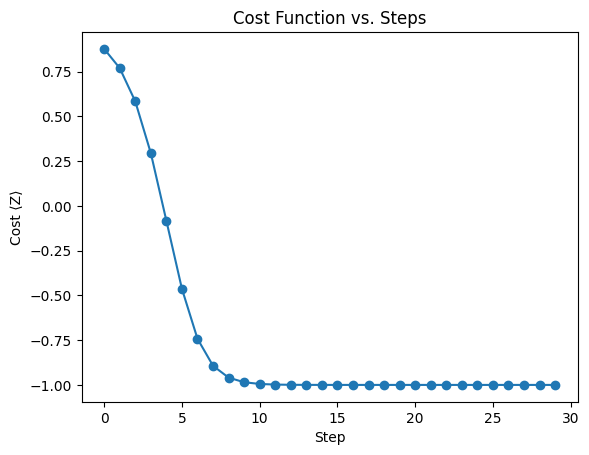

In [10]:
plt.plot(range(steps), costs, "-o")
plt.xlabel("Step")
plt.ylabel("Cost ⟨Z⟩")
plt.title("Cost Function vs. Steps")
plt.show()
